# Tutorial 5: Data Pipeline

__The goal of this assignment is to create 10 data pipelines based on Dask Bag API.__

For this exercise, we will use [Hillary Clinton emails that leaked before her campaign in 2015](https://www.kaggle.com/kaggle/hillary-clinton-emails). 

Dask is a flexible library for parallel computing in Python. Its API is similar to PySpark RDD.

Dask Bag is a subset of Dask specialized in processing large dataset with a small memory footprint.

The nice thing about Dask Bag is the processing is delayed as long as possible to save computation time.

Dask is a convenient parallel toolkit you can use to transform large collection of data prior to other analysis.

__Grade scale__: 20 points
- __correct query__: 2 points
- __incorrect query__: 0 points

__Further documentations__:
* https://learnxinyminutes.com/docs/python/
* http://docs.dask.org/en/stable/bag-overview.html
* https://www.kaggle.com/kaggle/hillary-clinton-emails

# Core

In [1]:
# import dask bag
import dask.bag as db

# read the emails, remove newlines and split them on '|'
emails = db.read_text('emails.csv.gz', compression='gzip')
emails = emails.str.rstrip().str.split('|')

# separate the bag between two set: the head (1st row) and body (other rows)
head, body = emails.filter(lambda x: x[0] == 'Id'), emails.remove(lambda x: x[0] == 'Id')

In [2]:
# index and print two rows
for email in emails.take(2):
    for i, field in enumerate(email):
        print("{}: {}".format(i, field))
    print()

0: Id
1: DocNumber
2: MetadataSubject
3: MetadataTo
4: MetadataFrom
5: SenderPersonId
6: MetadataDateSent
7: MetadataDateReleased
8: MetadataPdfLink
9: MetadataCaseNumber
10: MetadataDocumentClass
11: ExtractedSubject
12: ExtractedTo
13: ExtractedFrom
14: ExtractedCc
15: ExtractedDateSent
16: ExtractedCaseNumber
17: ExtractedDocNumber
18: ExtractedDateReleased
19: ExtractedReleaseInPartOrFull
20: ExtractedBodyText
21: RawText

0: 1
1: C05739545
2: WOW
3: H
4: Sullivan, Jacob J
5: 87
6: 2012-09-12T04:00:00+00:00
7: 2015-05-22T04:00:00+00:00
8: DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739545/C05739545.pdf
9: F-2015-04841
10: HRC_Email_296
11: FW: Wow
12: 
13: Sullivan, Jacob J <Sullivan11@state.gov>
14: 
15: Wednesday, September 12, 2012 10:16 AM
16: F-2015-04841
17: C05739545
18: 05/13/2015
19: RELEASE IN FULL
20: 
21: UNCLASSIFIED U.S. Department of State Case No. F-2015-04841 Doc No. C05739545 Date: 05/13/2015 STATE DEPT. - PRODUCED TO HOUSE SELECT BENGHAZI COMM. SUBJECT TO AGREEMENT O

# Examples

In [3]:
# - get the 13th field
# - take first 5 rows
body.pluck(13).take(5)

('Sullivan, Jacob J <Sullivan11@state.gov>',
 '',
 'Mills, Cheryl D <MillsCD@state.gov>',
 'Mills, Cheryl D <MillsCD@state.gov>',
 '')

In [4]:
# - get the 1st field
# - convert them to an int
# - compute the maximum value
# - the pipeline starts on .compute()
body.pluck(0).map(int).max().compute()

7945

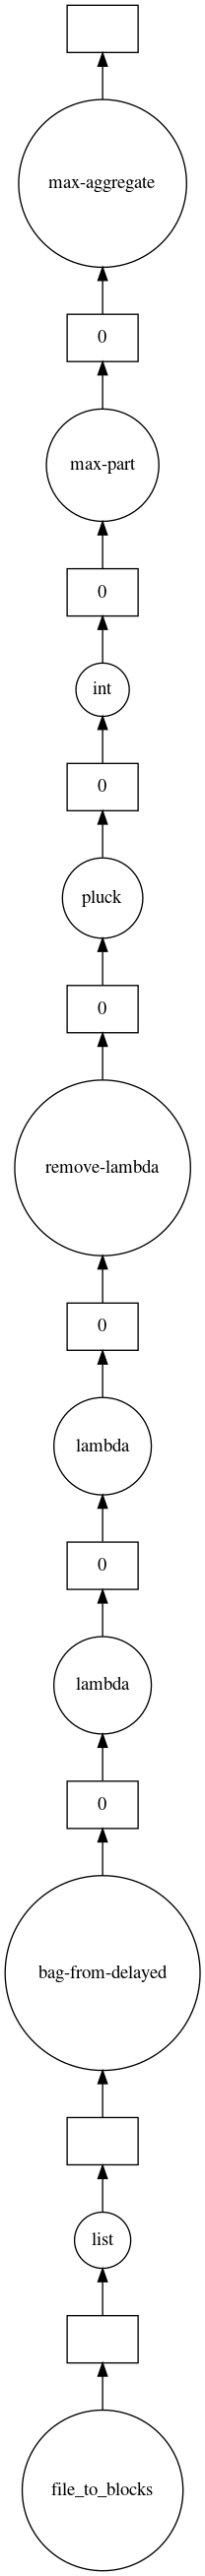

In [5]:
# you can also visualize the pipeline
body.pluck(0).map(int).max().visualize()

# Queries

__1. Count the number of distinct recipients (3: MetadataTo)__
* __hint__: use the right column index to pluck the recipient
* __return__: int

In [6]:
def Q1():
    ### BEGIN SOLUTION
    return body.pluck(3).distinct().count().compute()
    ### END SOLUTION

Q1()

236

In [7]:
assert isinstance(Q1(), int)
### BEGIN HIDDEN TESTS
assert Q1() == 236
### END HIDDEN TESTS

__2. Count the number of email sent by Hillary Clinton (4: MetadataFrom)__
* __hint__: email sent by Hillary Clinton have their sender value equals to "H"
* __return__: int

In [8]:
def Q2():
    ### BEGIN SOLUTION
    return body.pluck(4).filter(lambda x: x == "H").count().compute()
    ### END SOLUTION

Q2()

1906

In [9]:
assert isinstance(Q2(), int)
### BEGIN HIDDEN TESTS
assert Q2() == 1906
### END HIDDEN TESTS

__3. Return the frequencies of emails extracted fully or partially (sorted by value) (19: ExtractedReleaseInPartOrFull)__
* __hint__: Dask Bag provides a method to compute frequencies from selected columns
* __return__: List[Tuple[str, int]]

In [10]:
def Q3():
    ### BEGIN SOLUTION
    return body.pluck(19).frequencies(sort=True).compute()
    ### END SOLUTION

Q3()

[('RELEASE IN PART', 4327), ('RELEASE IN FULL', 3579), ('UNKNOWN', 38)]

In [11]:
assert len(Q3()) == 3
assert all(isinstance(row[0], str) and isinstance(row[1], int) for row in Q3())
### BEGIN HIDDEN TESTS
assert Q3() == [('RELEASE IN PART', 4327), ('RELEASE IN FULL', 3579), ('UNKNOWN', 38)]
### END HIDDEN TESTS

__4. Compute the average number of people in copy of email (14: ExtractedCc)__
* __hint__: you can split the recipients by ';' with str.split
* __return__: float

In [12]:
def Q4():
    ### BEGIN SOLUTION
    return body.pluck(14).str.split(';').map(len).mean().compute()
    ### END SOLUTION

Q4()

1.2243202416918428

In [13]:
assert isinstance(Q4(), float)
### BEGIN HIDDEN TESTS
assert 1.2 < Q4() < 1.3
### END HIDDEN TESTS

__5. Is there a subject associated to every email (2: MetadataSubject) ?__
* __hint__: you can use `all()` method to answer this question
* __return__: bool

In [14]:
def Q5():
    ### BEGIN SOLUTION
    return body.pluck(2).map(bool).all().compute()
    ### END SOLUTION

Q5()

False

In [15]:
assert isinstance(Q5(), bool)
### BEGIN HIDDEN TESTS
assert Q5() == False
### END HIDDEN TESTS

__6. Count the number of emails send from Hillary Cliton ('H') to Hillary Clinton ('H') (3: MetadataTo, 4: MetadataFrom)__
* __hint__: you have to build your your own filter for this case
* __return__: int

In [16]:
def Q6():
    ### BEGIN SOLUTION
    return body.filter(lambda row: row[3] == 'H' and row[4] == 'H').count().compute()
    ### END SOLUTION

Q6()

2

In [17]:
assert isinstance(Q6(), int)
### BEGIN HIDDEN TESTS
assert Q6() == 2
### END HIDDEN TESTS

__7. Count the total number of words in email bodies (21: RawText)__
* __hint__: words are extracted by splitting text by space ' '
* __return__: int (the words do not have to be distinct)

In [18]:
def Q7():
    ### BEGIN SOLUTION
    return body.pluck(21).str.split(' ').flatten().count().compute()
    ### END SOLUTION

Q7()

3011102

In [19]:
assert isinstance(Q7(), int)
### BEGIN HIDDEN TESTS
assert Q7() == 3011102
### END HIDDEN TESTS

__8. Find document ID and the size (in characters) of the longest email (0: Id, 21: RawText)__
* __hint__: you can use `fold` to find the longest document through reduction
* __return__: Tuple[str, int] (important: keep the first longest document !)

In [20]:
def Q8():
    ### BEGIN SOLUTION
    doc = body.fold(lambda a, b: b if len(b[21]) > len(a[21]) else a).compute()
    
    return (doc[0], len(doc[21]))
    ### END SOLUTION

Q8()

('3606', 98142)

In [21]:
assert len(Q8()) == 2
assert isinstance(Q8()[0], str)
assert isinstance(Q8()[1], int)
### BEGIN HIDDEN TESTS
assert Q8() == ('3606', 98142)
### END HIDDEN TESTS

__9. Count the number of emails sent by year (sorted by value) (6: MetadataDateSent)__
* __hint__: you can use regexp or split to extract years from dates
* __return__: List[Tuple[str, int]]

In [22]:
def Q9():
    ### BEGIN SOLUTION
    return body.pluck(6).map(lambda x: x.split('-')[0]).frequencies(sort=True).compute()
    ### END SOLUTION

Q9()

[('2010', 4013),
 ('2009', 3494),
 ('2012', 250),
 ('', 132),
 ('2011', 52),
 ('2014', 2),
 ('2008', 1)]

In [23]:
assert len(Q9()) == 7
assert all(isinstance(row[0], str) and isinstance(row[1], int) for row in Q9())
### BEGIN HIDDEN TESTS
assert Q9() == [
    ('2010', 4013),
    ('2009', 3494),
    ('2012', 250),
    ('', 132),
    ('2011', 52),
    ('2014', 2),
    ('2008', 1)
]
### END HIDDEN TESTS

__10. Find the number of emails that contain the string "classified" (20: ExtractedBodyText)__
* __note__: the answer must include derived words like "unclassified" or "misclassified"
* __hint__: use `str.lower` to lowercase the text prior to filtering 
* __return__: int

In [24]:
def Q10():
    ### BEGIN SOLUTION
    return body.pluck(20).str.lower().filter(lambda text: 'classified' in text).count().compute()
    ### END SOLUTION

Q10()

40

In [25]:
assert isinstance(Q10(), int)
### BEGIN HIDDEN TESTS
assert Q10() == 40
### END HIDDEN TESTS